# Python for Machine Learning

### *Session \#5*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Probability and Bayes Theorem

### Exercises
---

**You are planning a picnic, but it's cloudy outside! Should we still go?**

**1. We have data on 300 days, and 135 of them are cloudy. What's the probability of a cloudy day,** `P(C)`**?**

In [1]:
135/300

0.45

**2. It only rains on 30 out of 300 days. What's the probability of rain,** `P(R)`**?**

In [2]:
30/300

0.1

**3. Of the rainy days, 15 of them were cloudy. What's the probability of** `P(C|R)` **?**

In [3]:
15/30

0.5

**4. Use Bayes' Theorem to find the chance of rain, given that it's cloudy:** `P(R|C)`

In [4]:
# P(C|R)P(R)/P(C)

15./30.*30./300./(135./300.)

0.11111111111111112

**5. New example: Are you being cheated in a coin flip? Assume that 9 out of 10 coins are fair.**

**What's the probability you're dealing with a fair coin** `P(F)`**? Probability of an unfair coin** `P(U)`**?**

In [5]:
# P(F)
9/10 

# P(U)
1/10

0.1

**6. Now you see the coin land heads 4 times in a row.** 

**What's the probability of this happening with a fair coin, i.e.** `P(HHHH|F)` **?**

In [6]:
# P(HHHH|F)

hhhh_f = 0.5 * 0.5 * 0.5 * 0.5
print(hhhh_f)

0.0625


**7. Unfair coins land heads 90% of the time.** 

**What's the probability of this happening with an unfair coin, i.e.** `P(HHHH|U)` **?**

In [7]:
# P(HHHH|U)

hhhh_u = 0.9 * 0.9 * 0.9 * 0.9
print(hhhh_u)

0.6561000000000001


### Extra Credit
---

**1. Use Bayes Theorem to compute the probability that the coin is unfair, i.e.** `P(U|HHHH)` 

Hint: You'll need `P(HHHH)`, the overall chance of getting 4 heads. To get this we need to combine `P(HHHH|F)` and `P(HHHH|U)`, weighted for how likely each type of coin is.

Summed up:  `P(HHHH)` = `P(HHHH|F)P(F)` + `P(HHHH|U)P(U)`

In [8]:
f=0.9
u=0.1
hhhh = hhhh_f * f + hhhh_u * u
u_hhhh = hhhh_u * u / hhhh
print(u_hhhh)

0.5384047267355982


## II. Multinomial Naive Bayes

### Warm Ups

*Type the given code into the cell below*

---

In [9]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

df = pd.read_csv("spam.csv", encoding = 'latin-1')
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Vectorize the words:** 
```
vec = CountVectorizer(stop_words='english', max_features=20)
```

In [10]:
vec = CountVectorizer(stop_words='english', max_features=20)
vec.fit(X) #Creates a separate column for each word
display(X.iloc[0])
print('')
print(vec.get_feature_names_out())
email_vecs = vec.transform(X).toarray() #Translate the emails into vectors
print(email_vecs[0])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'


['come' 'day' 'free' 'going' 'good' 'got' 'gt' 'just' 'know' 'like' 'll'
 'love' 'lt' 'ok' 'send' 'text' 'time' 'txt' 'ur' 'want']
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Create pipeline:** 
```
pipe = make_pipeline(vec, MultinomialNB())
```

In [11]:
pipe = make_pipeline(vec, MultinomialNB())

**Validation Curve:** 
```python
model_vc = ValidationCurve(pipe, 'multinomialnb__alpha', range(1, 12))
model_vc.fit(X_train, y_train)
```

ValidationCurve(ax=<Axes: >,
                estimator=Pipeline(steps=[('countvectorizer',
                                           CountVectorizer(max_features=20,
                                                           stop_words='english')),
                                          ('multinomialnb', MultinomialNB())]),
                param_name='multinomialnb__alpha',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

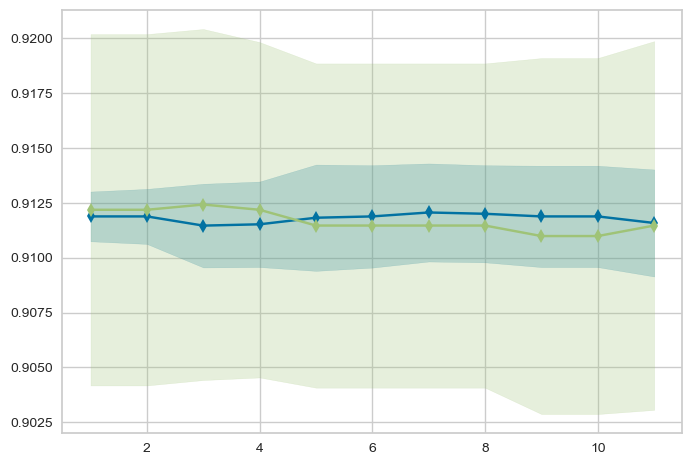

In [12]:
model_vc = ValidationCurve(pipe, 'multinomialnb__alpha', range(1, 12))
model_vc.fit(X_train, y_train)

### Exercises
---

**1. Create a variable** `ham` **for the text from rows of** `df` **that are categorized as ham.** 

**Likewise, create a variable** `spam` **for the text from rows of** `df` **that are categorized as spam**


Hint: Use boolean fitering first, then grab the `text` column

In [13]:
ham = df[df['category'] == 'ham'].text
spam = df[df['category'] == 'spam'].text

**2. The code below will fetch the number of times each feature (ie word) occurs**

**Use** `plt.barh()` **to show a histogram of the most common** `ham` **words**

Hint: `.barh()` expects a list of labels, then a list of values.

<BarContainer object of 20 artists>

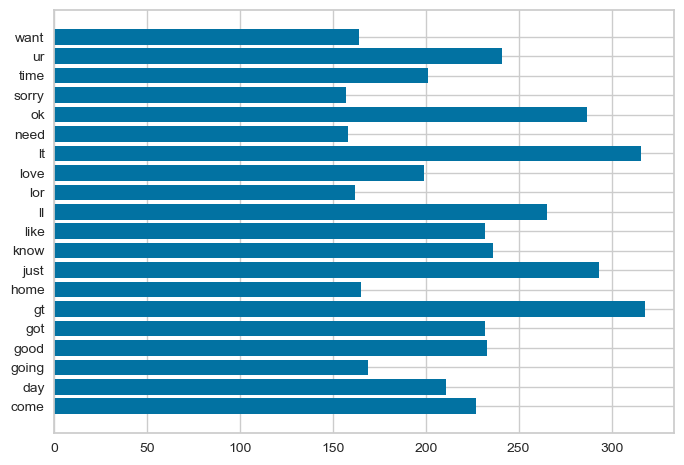

In [14]:
ham_counts = np.asarray(vec.fit_transform(ham).sum(axis=0))[0]
ham_features = vec.get_feature_names_out()

plt.barh(ham_features, ham_counts)

**3. Now fit** `vec` **to the** `spam` **dataset. Adapt the code above to create** `spam_counts` **and** `spam_features`

**Use** `plt.barh()` **to show a histogram of the most common** `spam` **words**

<BarContainer object of 20 artists>

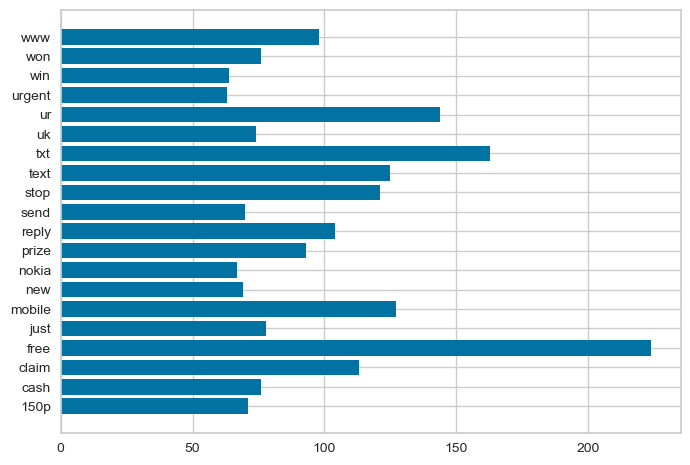

In [15]:
spam_counts = np.asarray(vec.fit_transform(spam).sum(axis=0))[0]
spam_features = vec.get_feature_names_out()

plt.barh(spam_features, spam_counts)

**4. Create a pipeline with a new** `CountVectorizer()` **and a** `MultinomialNB()` **model. You will need to:** 

* Create the pipeline
* Fit the model to the training set
* Score the model on the test set

0.9877961234745154


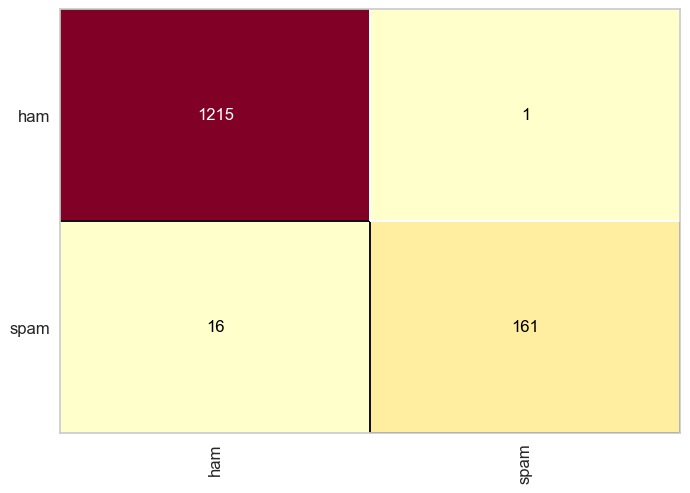

In [16]:
pipe = (make_pipeline(CountVectorizer(), ConfusionMatrix(MultinomialNB())))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

**5. The model's** `alpha` **parameter adjusts probability for complete misses, where a feature does not appear at all.**  
It's important to have *some* alpha to avoid multiplying by 0. The default alpha is 1.

**Use a validation curve to choose a good value for** `alpha`

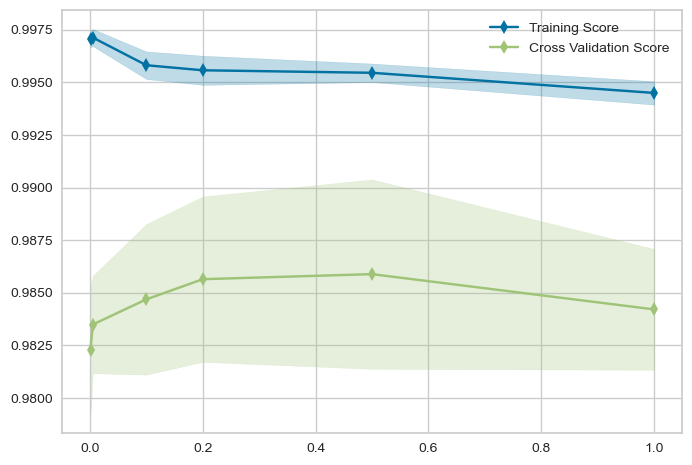

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
pipe25 = make_pipeline(CountVectorizer(), MultinomialNB())
curve = ValidationCurve(pipe25, 'multinomialnb__alpha', 
                        [0.001, 0.005, 0.1, 0.2, 0.5, 1.],
                        ax=ax)
curve.fit(X_train, y_train)
ax.legend()
plt.show()

## III. Multi-Class and Twitter Bot 

### Warm Ups

*Type the given code into the cell below*

---

In [18]:
#%pip install tweepy
import tweepy
from random import choices

tweets = pd.read_csv("tweets.csv")

### Exercises
---

**1. Create a pipeline with a new CountVectorizer() saved as** `vec` **and a MultinomialNB() saved as** `model` **and train it on** `tweets` 

**What is the accuracy of the model?**

Hint: For easy access, create `vec` and `model` before placing them in a pipeline

In [19]:
X = tweets['content']
y = tweets['author']
X_train, X_test, y_train, y_test = train_test_split(X, y)

vec = CountVectorizer()
model = MultinomialNB()
pipe = make_pipeline(vec, model)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6332978075517661

**2. Plot a** `ConfusionMatrix` **of your model. Which celebrity is hardest to classify?**         

0.6332978075517661


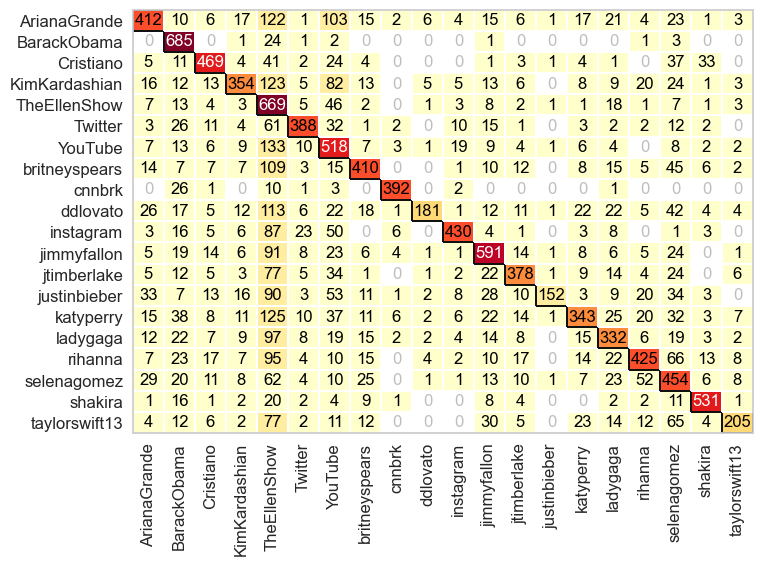

In [20]:
vec = CountVectorizer()
model = MultinomialNB()
pipe=make_pipeline(vec,ConfusionMatrix(model))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

**3. CountVectorizer allows for many parameters to improve the quality of data it produces for your model. Use the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to fine-tune your model with different combinations**

Note: We will learn how to automate this process with Grid Search in the next class

In [21]:
vec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=2)
model = MultinomialNB()
pipe = make_pipeline(vec, model)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6694579780755177

**4. The code below will select words at random, according to how frequently they're used by the chosen celebrity**

**Change the** `celeb_index` **and** `num_words` **to get different randomly generated tweets**

Hint: Use `model.classes_` to choose a specific celebrity

In [22]:
celeb_index = 0
num_words = 4

words = choices(vec.get_feature_names_out(),
                weights=model.feature_count_[celeb_index],
                k=num_words)

" ".join(words)

'love late https love'

**5. Run the code below to set up Tweepy**

**Pass a string to** `api.update_status()` **to send a tweet:** 

In [ ]:
auth = tweepy.OAuthHandler('8hQMoNize5oshYZjaqai1DyVR', 
                           'UhaEatmV6a0PdeuM1RWnsMNOJFHEmyNcFpsYb46czvnPJtzF1E')
auth.set_access_token('3629445439-YGOjZU7i4a455eDEtlUMmnx4koOYi0nax9ixGB7', 
                      'eEwqBLLWKIHZAU9WwOFgAfRhclTNpUYTRG6j4k3EaJCkO')
api = tweepy.API(auth)

# Add your code down here
api.update_status("Testing testing 123 -- student tweets incoming!")